In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [3]:
import matplotlib.pyplot as plt

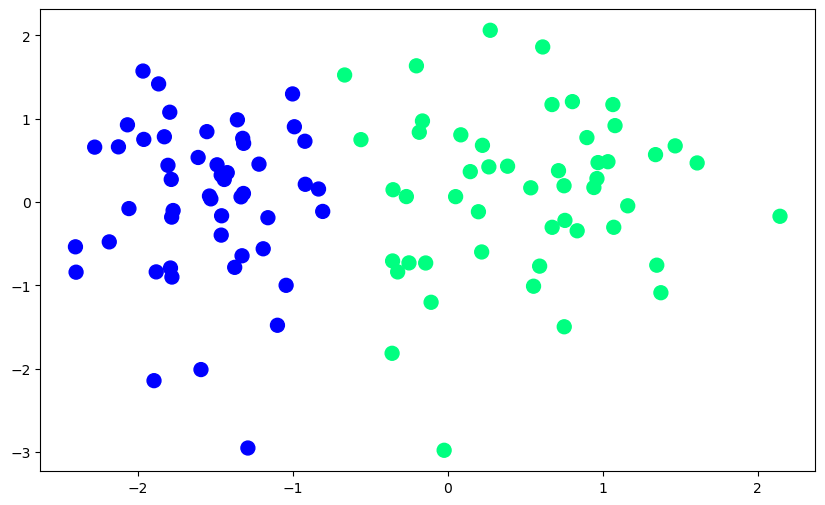

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [11]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [13]:
def step(z):
    return 1 if z>0 else 0

In [15]:
intercept_,coef_ = perceptron(X,y)

In [17]:
print(coef_)
print(intercept_)

[1.36225819 0.11751076]
1.0


In [19]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [21]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

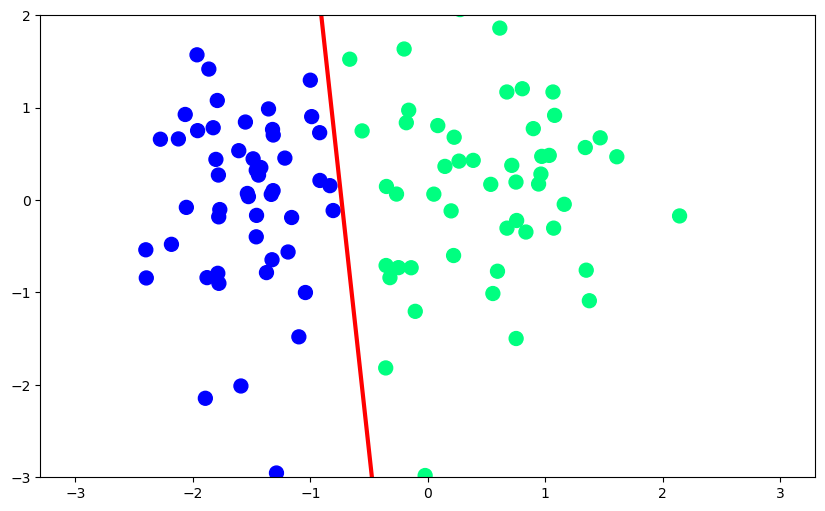

In [23]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [71]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [73]:
m,b = perceptron(X,y)

In [87]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

Animation saved as animation.gif


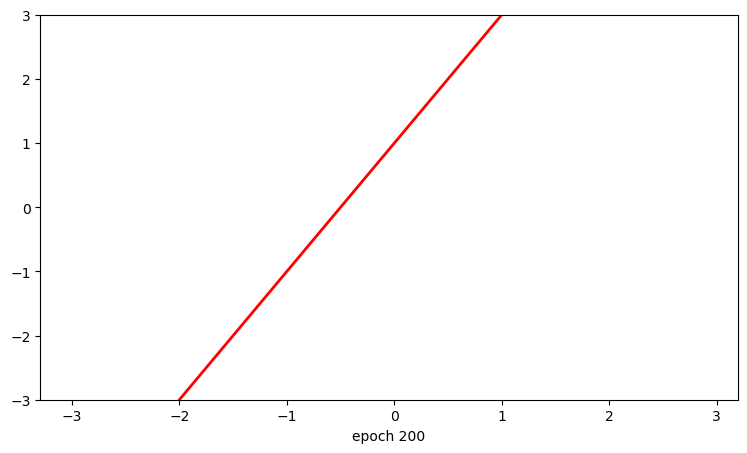

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML

# Ensure Matplotlib inline (works in Jupyter)
%matplotlib inline  

# Sample data (simulating training process)
m = np.linspace(0.5, 2, 200)  # Simulated slope values
b = np.linspace(-1, 1, 200)  # Simulated intercept values

# Create figure
fig, ax = plt.subplots(figsize=(9, 5))
x_i = np.arange(-3, 3, 0.1)
line, = ax.plot(x_i, x_i * m[0] + b[0], 'r-', linewidth=2)
plt.ylim(-3, 3)

# Update function
def update(i):
    line.set_ydata(x_i * m[i] + b[i])
    ax.set_xlabel(f'epoch {i + 1}')
    return line,

# Create animation
anim = FuncAnimation(fig, update, frames=200, interval=100, blit=True)

# Display animation inline
HTML(anim.to_jshtml())

# Save animation (GIF is default)
save_as_mp4 = False  # Change to True if you have FFmpeg installed

if save_as_mp4:
    try:
        anim.save("animation.mp4", writer="ffmpeg")
        print("Animation saved as animation.mp4")
    except Exception as e:
        print(f"FFmpeg not found! Install it using 'brew install ffmpeg' or use GIF instead.\nError: {e}")
else:
    anim.save("animation.gif", writer=PillowWriter(fps=20))
    print("Animation saved as animation.gif")


In [41]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [43]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [45]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

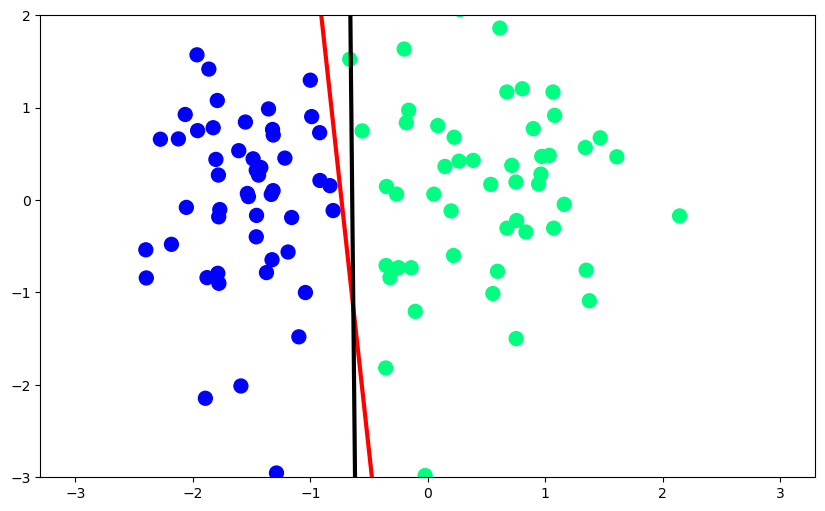

In [47]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)